# Índex

1. [Data Cleaning, Data Preparation and Feature Engineering](#data)
2. [EDA](#paso-1)
3. [Model](#paso-2)
4. [Conclusion](#conclusiones)

## Data Cleaning, Data Preparation and Feature Engineering <a name="data"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("muted")

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import log_loss, mutual_info_score, confusion_matrix

import tensorflow as tf
import keras

In [2]:
import zipfile
import os

In [3]:
nombre_archivo_zip = r"E:/Kaggle/Cirrhosis Predictor/playground-series-s3e26.zip"
nombre_carpeta_destino = r"C:/Users/robme/OneDrive/Escritorio/Carpeta-EntornoTrabajo-Git/Cirrhosis Prediction"

In [4]:
#with zipfile.ZipFile(nombre_archivo_zip, 'r') as zip_ref:
#    zip_ref.extractall(nombre_carpeta_destino)
#print("Descomprimido")

In [5]:
data = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

In [6]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,0,1,2,3,4,5,6,7,8,9
N_Days,999,2574,3428,2576,788,703,1300,1615,2050,2615
Drug,D-penicillamine,Placebo,Placebo,Placebo,Placebo,D-penicillamine,Placebo,Placebo,D-penicillamine,D-penicillamine
Age,21532,19237,13727,18460,16658,19270,17703,21281,20684,15009
Sex,M,F,F,F,F,F,F,F,F,F
Ascites,N,N,N,N,N,N,N,N,N,N
Hepatomegaly,N,N,Y,N,Y,Y,N,Y,N,N
Spiders,N,N,Y,N,N,N,N,N,N,N
Edema,N,N,Y,N,N,N,N,N,N,N
Bilirubin,2.3,0.9,3.3,0.6,1.1,0.6,1.0,0.6,0.7,0.9


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [8]:
# Rename column names
data.columns = data.columns.str.lower()
data_test.columns = data_test.columns.str.lower()


In [9]:
# Convert dtype
data.stage = data.stage.astype('object')
data_test.stage = data_test.stage.astype('object')

data.drug = data.drug.str.lower().str.replace('-','')
data_test.drug = data_test.drug.str.lower().str.replace('-','')

data.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,0,1,2,3,4,5,6,7,8,9
n_days,999,2574,3428,2576,788,703,1300,1615,2050,2615
drug,dpenicillamine,placebo,placebo,placebo,placebo,dpenicillamine,placebo,placebo,dpenicillamine,dpenicillamine
age,21532,19237,13727,18460,16658,19270,17703,21281,20684,15009
sex,M,F,F,F,F,F,F,F,F,F
ascites,N,N,N,N,N,N,N,N,N,N
hepatomegaly,N,N,Y,N,Y,Y,N,Y,N,N
spiders,N,N,Y,N,N,N,N,N,N,N
edema,N,N,Y,N,N,N,N,N,N,N
bilirubin,2.3,0.9,3.3,0.6,1.1,0.6,1.0,0.6,0.7,0.9


In [10]:
# Transform into binary variables
data['sex'] = data['sex'].replace({'M': 0, 'F':1})
data_test['sex'] = data_test['sex'].replace({'M': 0, 'F':1})
data.drug = data.drug.replace({'placebo': 0, 'dpenicillamine': 1})
data_test.drug = data_test.drug.replace({'placebo': 0, 'dpenicillamine': 1})

# inplace=True does not apply since we are redefining the columns
for col in ['ascites', 'hepatomegaly', 'spiders']:
    data[col] = data[col].replace({'N': 0, 'Y': 1})
    data_test[col] = data_test[col].replace({'N': 0, 'Y': 1})

In [11]:
data_test = data_test.drop('id', axis=1)

In [12]:
# drop id col
data = data.drop('id', axis=1)


In [13]:
# Check 
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
n_days,999,2574,3428,2576,788,703,1300,1615,2050,2615
drug,1,0,0,0,0,1,0,0,1,1
age,21532,19237,13727,18460,16658,19270,17703,21281,20684,15009
sex,0,1,1,1,1,1,1,1,1,1
ascites,0,0,0,0,0,0,0,0,0,0
hepatomegaly,0,0,1,0,1,1,0,1,0,0
spiders,0,0,1,0,0,0,0,0,0,0
edema,N,N,Y,N,N,N,N,N,N,N
bilirubin,2.3,0.9,3.3,0.6,1.1,0.6,1.0,0.6,0.7,0.9
cholesterol,316.0,364.0,299.0,256.0,346.0,227.0,328.0,273.0,360.0,478.0


In [14]:
# Feature Engineering

# upper limit of platelets
lim_platelets = 150
data['thrombocytopenia'] = np.where(data['platelets'] < lim_platelets, 1, 0)
data_test['thrombocytopenia'] = np.where(data_test['platelets'] < lim_platelets, 1, 0)

# normal Cu range (list)
n_cu_range = (62, 140)
data['normal_copper'] = np.where((data.copper >= n_cu_range[0]) & (data.copper <= n_cu_range[1]), 1, 0)
data_test['normal_copper'] = np.where((data_test.copper >= n_cu_range[0]) & (data_test.copper <= n_cu_range[1]), 1, 0)

# normal albumin range (list)
n_alb_range = (3.4, 5.4)
data['normal_albumin'] = np.where((data.albumin >= n_alb_range[0]) & (data.albumin <= n_alb_range[1]), 1, 0)
data_test['normal_albumin'] = np.where((data_test.albumin >= n_alb_range[0]) & (data_test.albumin <= n_alb_range[1]), 1, 0)

# normal bilirubin range
n_bil_range = (0.2, 1.2)
data['normal_bilirubin'] = np.where((data.bilirubin >= n_bil_range[0]) & (data.bilirubin <= n_bil_range[1]), 1, 0)
data_test['normal_bilirubin'] = np.where((data_test.bilirubin >= n_bil_range[0]) & (data_test.bilirubin <= n_bil_range[1]), 1, 0)

In [15]:
# Feature creation guided by expertise in a specific field.

# MELD score
data['meld'] = 9.57 * np.log(data.bilirubin) + 3.78 * np.log(data.sgot) + 11.2 * np.log(data.tryglicerides) + 6.43
data_test['meld'] = 9.57 * np.log(data_test.bilirubin) + 3.78 * np.log(data_test.sgot) + 11.2 * np.log(data_test.tryglicerides) + 6.43

# Child-Pugh score
data['child_pugh'] = 6 * (0.002 * data.bilirubin + 0.378 * np.log(data.sgot) + 1.12 * data.ascites + 0.957 * data.hepatomegaly + 0.643 * (data.edema == 'Y'))
data_test['child_pugh'] = 6 * (0.002 * data_test.bilirubin + 0.378 * np.log(data_test.sgot) + 1.12 * data_test.ascites + 0.957 * data_test.hepatomegaly + 0.643 * (data_test.edema == 'Y'))

In [16]:
# Create indicators
data['bilirubin_albumin_rate'] = data.bilirubin/data.albumin
data['age'] = data.age/365 # Age in years
data_test['bilirubin_albumin_rate'] = data_test.bilirubin/data_test.albumin
data_test['age'] = data_test.age/365 # Age in years

In [17]:
data_test.T

,0,1,2,3,4,5,6,7,8,9,...,5261,5262,5263,5264,5265,5266,5267,5268,5269,5270
n_days,3839,2468,51,2330,1615,1433,1785,1925,41,1765,...,1077,1558,2332,1234,2573,2870,1770,3707,1216,2272
drug,1,1,0,1,1,1,0,1,1,1,...,1,0,0,0,0,0,0,1,0,1
age,54.038356,41.027397,36.024658,56.191781,60.010959,56.191781,52.219178,54.778082,65.928767,78.493151,...,53.342466,44.427397,62.564384,62.457534,42.772603,33.641096,67.953425,46.547945,32.254795,59.178082
sex,1,1,1,1,1,1,1,1,1,0,...,0,1,1,1,1,1,1,1,1,1
ascites,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
hepatomegaly,1,0,1,0,1,0,0,1,1,1,...,1,0,0,1,0,0,0,1,0,0
spiders,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
edema,N,N,Y,N,N,N,N,S,N,S,...,N,N,N,N,N,N,N,N,N,N
bilirubin,1.2,1.1,2.0,0.6,1.4,0.8,0.4,1.8,17.9,6.4,...,2.2,0.7,0.6,4.5,0.8,1.3,0.5,0.8,0.7,2.0
cholesterol,546.0,660.0,151.0,293.0,277.0,198.0,273.0,244.0,178.0,243.0,...,572.0,217.0,235.0,328.0,217.0,302.0,219.0,315.0,329.0,232.0


In [18]:
# BMI Calculation
data['age_group'] = pd.cut(data.age, bins=[0, 30, 40, 50, 60, 70, 100], labels=['0-30', '31-40', '41-50', '51-60', '61-70', '71+'])
data_test['age_group'] = pd.cut(data_test.age, bins=[0, 30, 40, 50, 60, 70, 100], labels=['0-30', '31-40', '41-50', '51-60', '61-70', '71+'])

## Exploratory Data Analysis <a name="paso-1"></a>

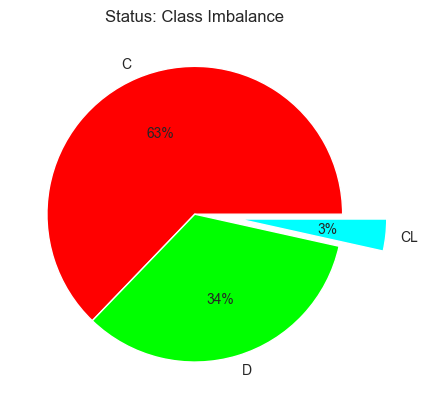

In [19]:
colors = ["#ff0000", "#00FF00", "#00FFFF"]

fig, ax = plt.subplots()

# columna.valores(se normaliza para la proporcion respecto del total).grafico de torta.(cuanto quiero separar)
data['status'].value_counts(normalize=True).plot.pie(ax=ax, explode=[0,0,0.3], autopct='%.0f%%', textprops={'size': 10}, ylabel='', colors=colors)
ax.set_title('Status: Class Imbalance')
plt.show()

In [20]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
n_days,999,2574,3428,2576,788,703,1300,1615,2050,2615
drug,1,0,0,0,0,1,0,0,1,1
age,58.991781,52.70411,37.608219,50.575342,45.638356,52.794521,48.50137,58.30411,56.668493,41.120548
sex,0,1,1,1,1,1,1,1,1,1
ascites,0,0,0,0,0,0,0,0,0,0
hepatomegaly,0,0,1,0,1,1,0,1,0,0
spiders,0,0,1,0,0,0,0,0,0,0
edema,N,N,Y,N,N,N,N,N,N,N
bilirubin,2.3,0.9,3.3,0.6,1.1,0.6,1.0,0.6,0.7,0.9
cholesterol,316.0,364.0,299.0,256.0,346.0,227.0,328.0,273.0,360.0,478.0


In [21]:
# Numerical and categorical columns
cat_col = ['drug', 'sex', 'ascites', 'hepatomegaly', 'spiders', 'edema',
           'stage', 'thrombocytopenia', 'normal_copper', 'normal_albumin', 
           'normal_bilirubin', 'age_group']

num_col = ['age', 'n_days', 'bilirubin', 'cholesterol', 'albumin', 'copper',
           'alk_phos', 'sgot', 'tryglicerides', 'platelets', 'prothrombin',
           'meld', 'child_pugh', 'bilirubin_albumin_rate']

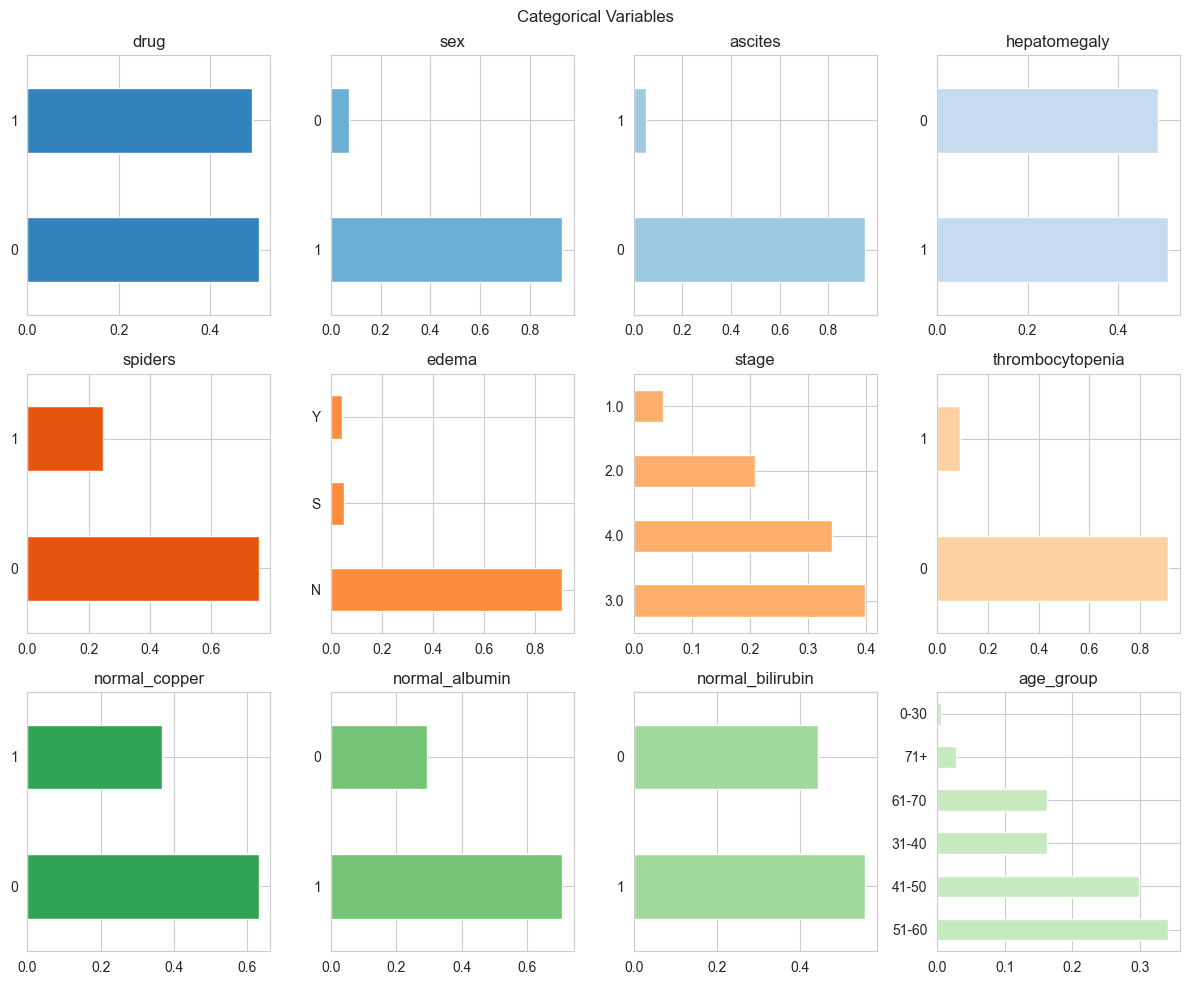

In [22]:
%matplotlib inline

cmap = plt.get_cmap("tab20c")
colors = cmap(range(len(cat_col)))
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(12, 10))
axs = axs.flatten()

for i, col in enumerate(cat_col):
    data[col].value_counts(normalize=True).plot.barh(ax=axs[i], color=colors[i], ylabel='')
    axs[i].set_title(col)

fig.suptitle('Categorical Variables')
plt.tight_layout()
plt.show()

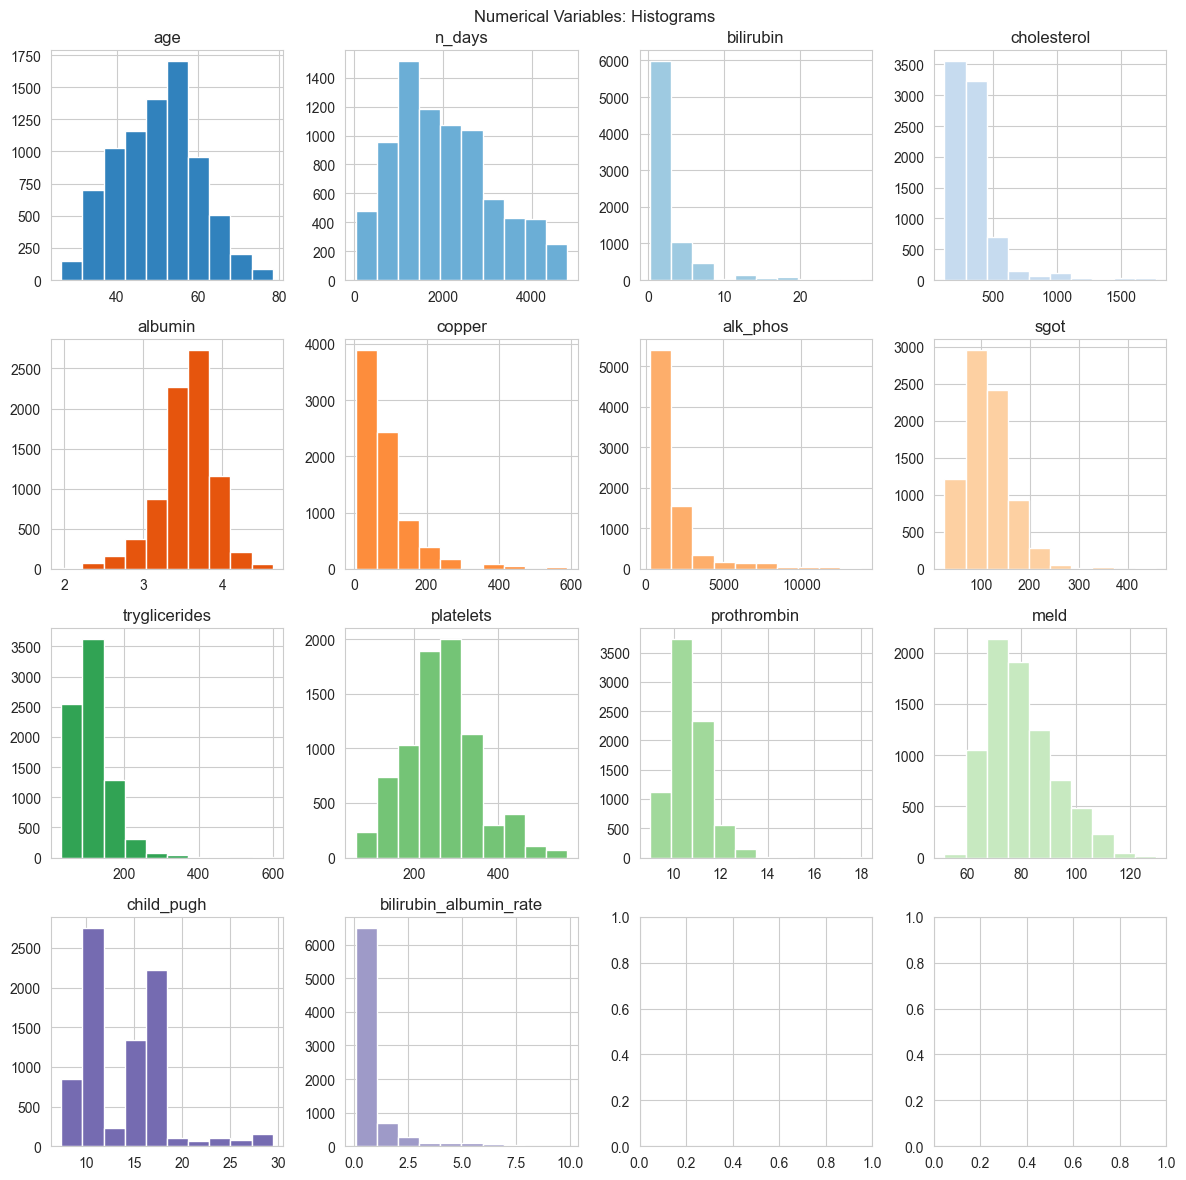

In [23]:
%matplotlib inline

cmap = plt.get_cmap('tab20c')
colors = cmap(range(len(num_col)))

fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(12, 12))
axs = axs.flatten()

for j, col in enumerate(num_col):
    data[col].plot.hist(ax=axs[j], color=colors[j], ylabel='')
    axs[j].set_title(col)

fig.suptitle('Numerical Variables: Histograms')
plt.tight_layout()
plt.show()

In [24]:
# log transform for cols
log_cols = ['cholesterol', 'copper', 'alk_phos', 'tryglicerides']

for col in log_cols:
    data[col] = np.log1p(data[col])
    data_test[col] = np.log1p(data_test[col])

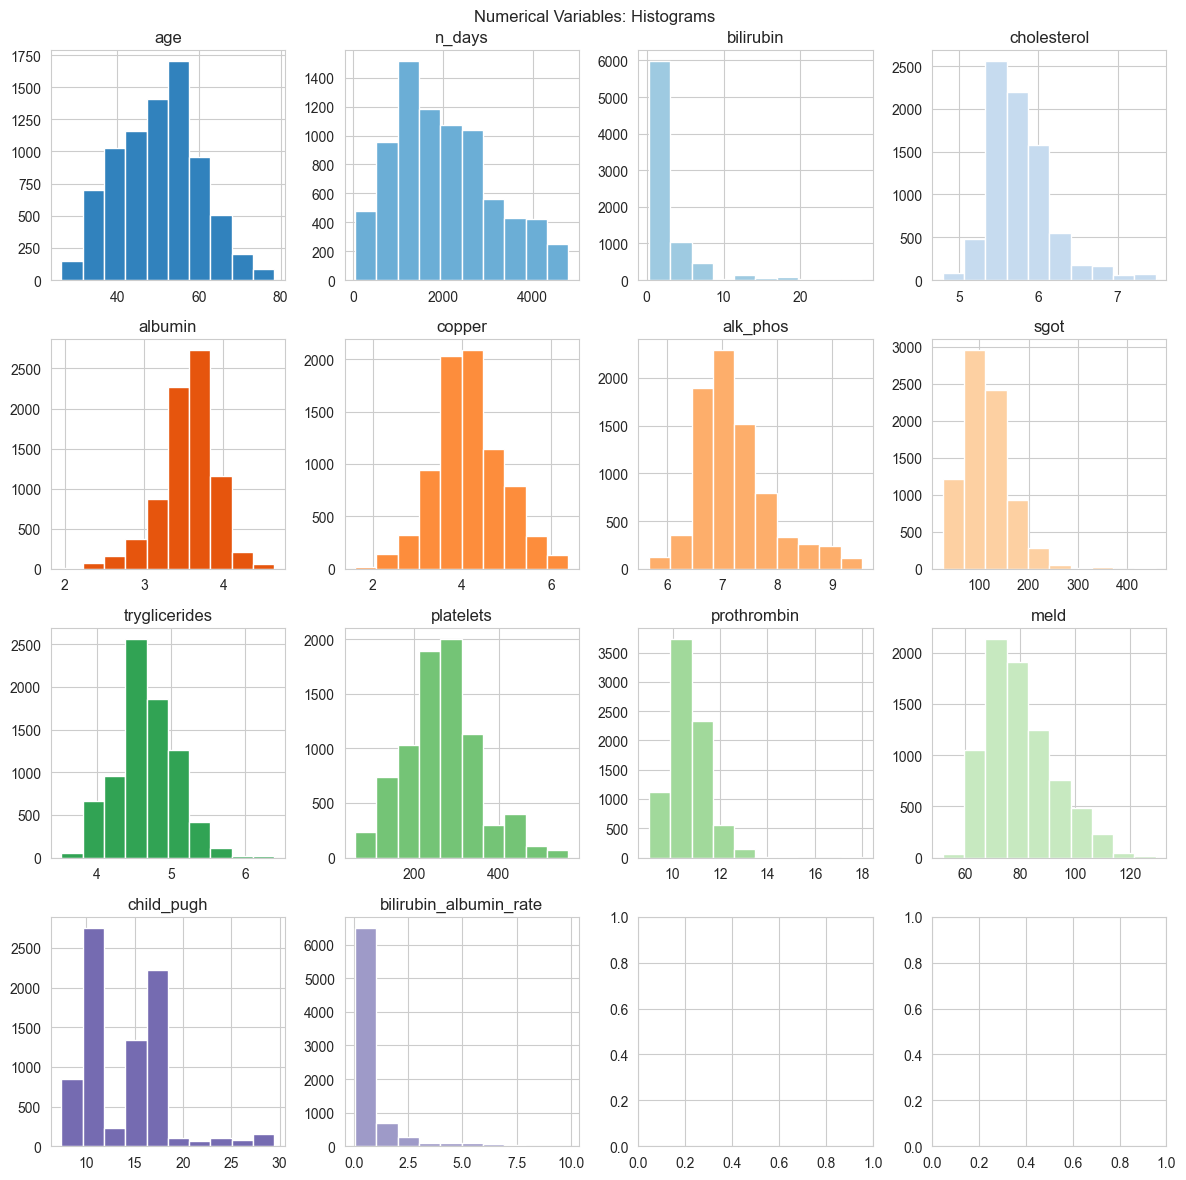

In [25]:
%matplotlib inline

cmap = plt.get_cmap('tab20c')
colors = cmap(range(len(num_col)))

fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(12, 12))
axs = axs.flatten()

for j, col in enumerate(num_col):
    data[col].plot.hist(ax=axs[j], color=colors[j], ylabel='')
    axs[j].set_title(col)

fig.suptitle('Numerical Variables: Histograms')
plt.tight_layout()
plt.show()

# Feature Importance

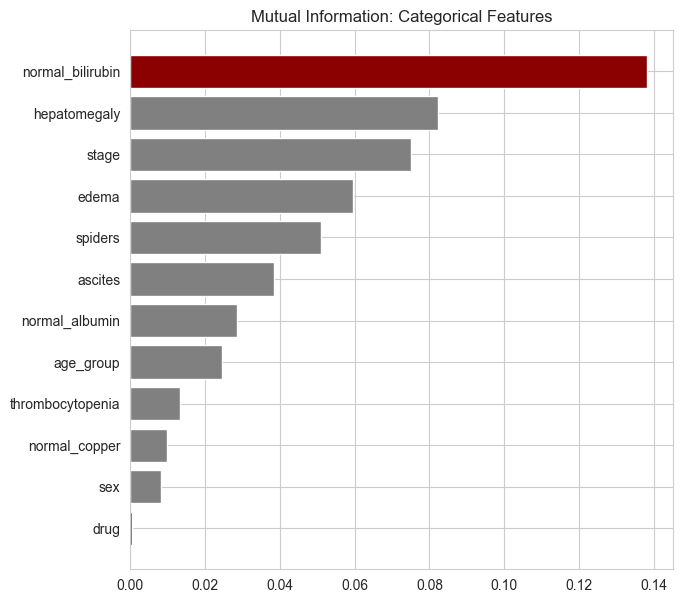

In [26]:
# Categorical data importance

# Tuple
mutual_scores = []
for col in cat_col:
    mutual_data = mutual_info_score(data[col], data['status'])
    mutual_scores.append((col, mutual_data))

# Sorted tuple
mutual_scores_sorted = sorted(mutual_scores, key=lambda x: x[1], reverse=False)

features = [score[0] for score in mutual_scores_sorted]
scores = [score[1] for score in mutual_scores_sorted]

# plot
fig, ax = plt.subplots(figsize=(7,7))
ax.barh(features, scores, color=['darkred'] + 10*['grey'])
ax.set_title('Mutual Information: Categorical Features')
plt.show()


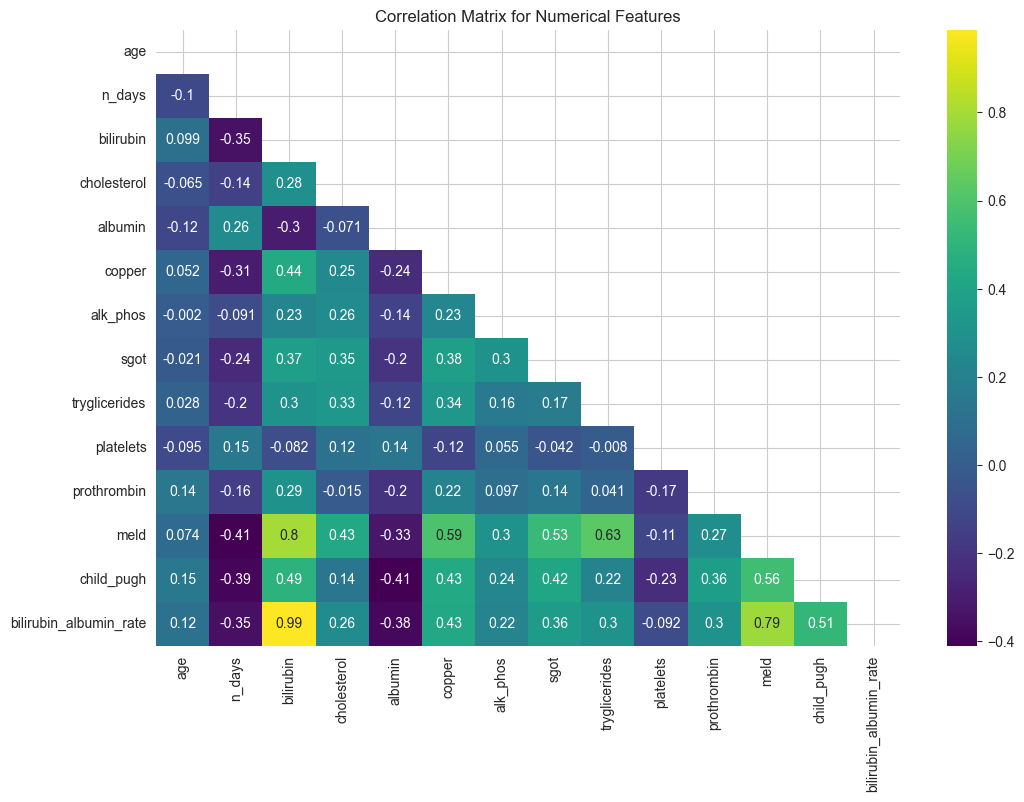

In [27]:
# Correlation heatmap for numerical features
fig, ax = plt.subplots(figsize=(12,8))
corr = data[num_col].corr().round(3)
sns.heatmap(corr, annot=True, cmap='viridis', mask=np.triu(corr), ax=ax)
ax.set_title('Correlation Matrix for Numerical Features')
plt.show()

## Establishing a Validation Framework. Building the model <a name="paso-2"></a>

In [28]:
# Divide the dataset for model evaluation
X = data.drop('status', axis=1)
y = data['status']

In [29]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Target Encoding
le = LabelEncoder()
yc_train_encoded = le.fit_transform(yc_train)
yc_test_encoded = le.transform(yc_test)

In [31]:
# Feature Encoding
le_cols = ['sex', 'ascites', 'hepatomegaly', 'spiders', 'thrombocytopenia', 'normal_copper', 'normal_albumin', 'normal_bilirubin']
onehot_cols = ['edema', 'stage', 'age_group'] # letters, range str or number str

num_cols = ['age', 'n_days', 'bilirubin', 'cholesterol', 'albumin', 'copper', 'alk_phos', 'sgot', 'tryglicerides', 'platelets', 'prothrombin', 'meld', 'child_pugh', 'bilirubin_albumin_rate']

In [32]:
# Global function for encoding lists
def encode_global(df, numerical_cols, onehot_encoder_cols, label_encoder_cols):
    sc = MinMaxScaler()
    X_num = sc.fit_transform(df[numerical_cols])

    ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
    X_ohe = ohe.fit_transform(df[onehot_encoder_cols])
    ohe_features = ohe.get_feature_names_out().tolist()

    X_le = df[label_encoder_cols].values

    X = np.column_stack([X_num, X_le, X_ohe])
    ftres = numerical_cols + label_encoder_cols + ohe_features

    return X, sc, ohe, ftres


In [33]:
X_train, scaler, one_hot_encoder, features_na = encode_global(Xc_train, num_cols, onehot_cols, le_cols)

c:\Users\robme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [34]:
# Validation test
def e_val_test(df, sc, ohe):
    X_num = sc.transform(df[num_cols])
    X_ohe = ohe.transform(df[onehot_cols])
    X_le = df[le_cols].values

    return np.column_stack([X_num, X_le, X_ohe])

In [35]:
X_test = e_val_test(Xc_test, scaler, one_hot_encoder)
X_test_k = e_val_test(data_test, scaler, one_hot_encoder)

## A) Model Tensorflow/Keras

In [36]:
def FNN_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(32, input_dim=X_train.shape[1], activation='relu'))
    model.add(keras.layers.Dense(16, activation='relu'))
    model.add(keras.layers.Dense(len(le.classes_), activation='softmax'))

    optimizer = keras.optimizers.Adam(learning_rate=5e-3)
    loss = keras.losses.SparseCategoricalCrossentropy()
    metrics = ['accuracy']

    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    return model

In [37]:
# Model hyperparam
epochs = 55
batch_size = 2048
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)

fnn_model = FNN_model()

hist = fnn_model.fit(X_train, yc_train_encoded, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[earlystopping], verbose=0)

Epoch 55: early stopping


50/50 [==============================] - 0s 2ms/step


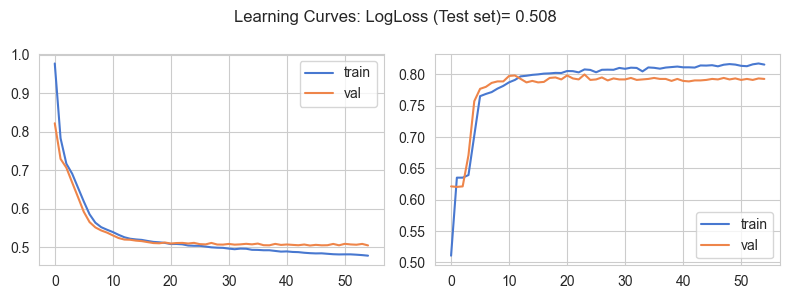

In [38]:
# plot model
fig, axs = plt.subplots(ncols=2, figsize=(8,3))
axs[0].plot(hist.history['loss'], label='train')
axs[0].plot(hist.history['val_loss'], label='val')
axs[0].legend()
axs[1].plot(hist.history['accuracy'], label='train')
axs[1].plot(hist.history['val_accuracy'], label='val')
axs[1].legend()
fig.suptitle(f'Learning Curves: LogLoss (Test set)= {log_loss(yc_test_encoded, fnn_model.predict(X_test)):0.3f}')

plt.tight_layout()
plt.show()

# Predictions

In [39]:
y_pred = fnn_model.predict(X_test)
y_pred = pd.DataFrame(y_pred)
y_pred = y_pred.div(y_pred.sum(axis=1), axis=0)
log_loss(yc_test_encoded, y_pred)

50/50 [==============================] - 0s 2ms/step


0.5079405928332844

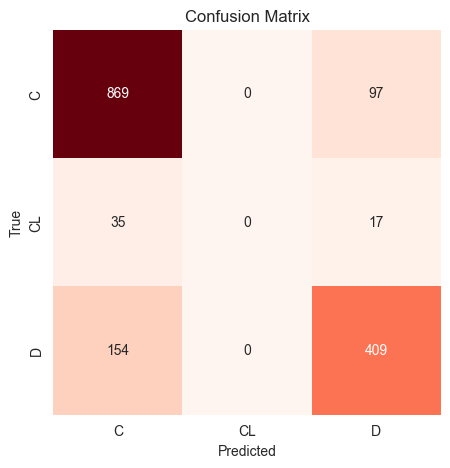

In [40]:
y_pred_labels = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(yc_test_encoded, y_pred_labels)

plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# B) Model XGBoost/LightGBM

In [41]:
from sklearn.utils.class_weight import compute_class_weight

c_weight = compute_class_weight('balanced', classes=[0, 1, 2], y=yc_train_encoded)

In [42]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(eta=0.1, max_depth=9, min_child_weight=30, random_state=42, eval_metric=log_loss)

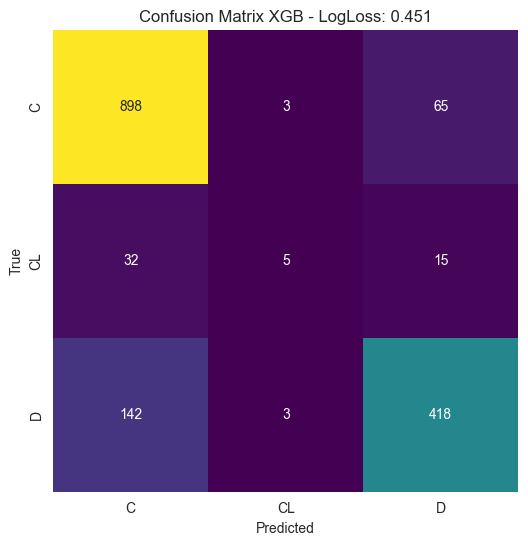

In [44]:
xgb_model.fit(X_train, yc_train_encoded)

y_pred_a = xgb_model.predict_proba(X_test)
y_pred_labels_a = xgb_model.predict(X_test)
conf_matrix_a = confusion_matrix(yc_test_encoded, y_pred_labels_a)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_a, annot=True, fmt='d', cmap='viridis', cbar=False, xticklabels=le.classes_, yticklabels=le.classes_)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f"Confusion Matrix XGB - LogLoss: {log_loss(yc_test_encoded, y_pred_a, labels=[0, 1, 2]):.3f}")
plt.show()

In [48]:
import lightgbm as lgbm

lgbm_model = lgbm.LGBMClassifier(learning_rate=0.15, max_depth=3, n_estimators=1500, random_state=42)

lgbm_model.fit(X_train, yc_train_encoded)
y_pred_b = lgbm_model.predict_proba(X_test)
y_pred_labels_b = lgbm_model.predict(X_test)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2701
[LightGBM] [Info] Number of data points in the train set: 6324, number of used features: 35
[LightGBM] [Info] Start training from score -0.458308
[LightGBM] [Info] Start training from score -3.344935
[LightGBM] [Info] Start training from score -1.101463
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

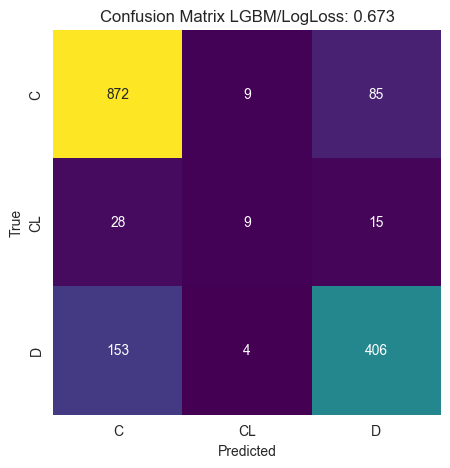

In [55]:
conf_matrix_b = confusion_matrix(yc_test_encoded, y_pred_labels_b)

plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_b, annot=True, fmt='d', cmap='viridis', cbar=False, xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f"Confusion Matrix LGBM/LogLoss: {log_loss(yc_test_encoded, y_pred_b, labels=[0, 1, 2]):.3f}")
plt.show()

# Ensemble

In [50]:
from sklearn.ensemble import VotingClassifier

e_model = VotingClassifier(estimators=[('lgb', lgbm_model), ('xgb', xgb_model)], voting='soft', weights=[0.5, 0.5])
e_model.fit(X_train, yc_train_encoded)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2701
[LightGBM] [Info] Number of data points in the train set: 6324, number of used features: 35
[LightGBM] [Info] Start training from score -0.458308
[LightGBM] [Info] Start training from score -3.344935
[LightGBM] [Info] Start training from score -1.101463
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

VotingClassifier(estimators=[('lgb',
                              LGBMClassifier(learning_rate=0.15, max_depth=3,
                                             n_estimators=1500,
                                             random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False, eta=0.1,
                                            eval_metric=<function log_los...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=9,
                                            max_leaves=None,
                                            min_child_weight=30, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft', weights=[0.5, 0.5])

In [51]:
y_pred_f = e_model.predict_proba(X_test)
y_pred_labels_f = e_model.predict(X_test)

c:\Users\robme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


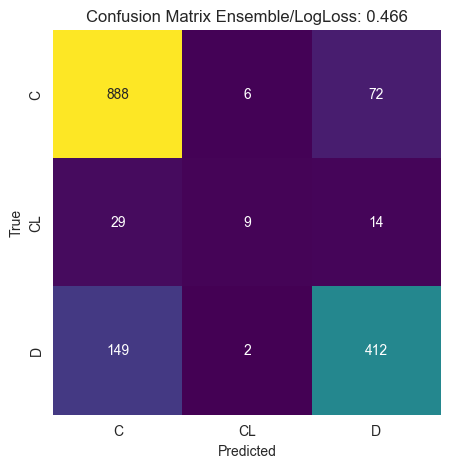

In [54]:
conf_matrix_c = confusion_matrix(yc_test_encoded, y_pred_labels_f)

plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_c, annot=True, fmt='d', cmap='viridis', cbar=False, xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f"Confusion Matrix Ensemble/LogLoss: {log_loss(yc_test_encoded, y_pred_f, labels=[0, 1, 2]):.3f}")
plt.show()

In [62]:
# Create prediction from test data
y_pred_sample = e_model.predict_proba(X_test_k)
y_pred_sample = pd.DataFrame(y_pred_sample)

sub = pd.read_csv('sample_submission.csv')
sub[['Status_C', 'Status_D', 'Status_CL']] = y_pred_sample

sub.to_csv("C:/Users/robme/OneDrive/Escritorio/Carpeta-EntornoTrabajo-Git/Cirrhosis Prediction/predictions.csv", index=False)
sub.head()

,id,Status_C,Status_CL,Status_D
0,7905,0.381584,0.609840,0.008576
1,7906,0.582897,0.086320,0.330783
2,7907,0.005889,0.988680,0.005431
3,7908,0.985520,0.012483,0.001997
4,7909,0.911215,0.067639,0.021146


## Final Thoughts <a name="conclusiones"></a>

This code demonstrates a strong method for predicting liver disease, integrating multiple machine learning models and an ensemble technique to enhance accuracy. The blend of neural networks and gradient boosting models creates a thorough and well-rounded predictive model. The resulting predictions are ready for submission, offering a pragmatic and complete data science solution.